# Cheatsheet Exam FMAD
Cheatsheet for code for the fmad exam

In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.power as smp
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

sns.set(rc={'figure.figsize':(12, 12)})

## Exploratory Analysis

In [2]:
path = 'PreviousExams/data/empleados.csv' # Change
data = pd.read_csv(path)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,DailyRate,1463,Bachelor//Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,HourlyRate,64,Bachelor//Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,MonthlyRate,14408,Bachelor//Medical
3,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,DailyRate,874,Bachelor//Medical
4,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,HourlyRate,72,Bachelor//Medical


### Variable description

#### Number of rows and columns

In [3]:
print(f"There are {len(data)} observations in the table")
print(f"There are {len(data.columns)} variables in the table")

There are 3528 observations in the table
There are 21 variables in the table


#### Non-null count and variable type

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3528 non-null   int64  
 1   Attrition              3528 non-null   object 
 2   BusinessTravel         3528 non-null   object 
 3   Department             3528 non-null   object 
 4   DistanceFromHome       3519 non-null   float64
 5   Gender                 3528 non-null   object 
 6   JobLevel               3528 non-null   int64  
 7   JobRole                3528 non-null   object 
 8   JobSatisfaction        3528 non-null   object 
 9   MaritalStatus          3528 non-null   object 
 10  MonthlyIncome          3528 non-null   int64  
 11  NumCompaniesWorked     3522 non-null   float64
 12  OverTime               3528 non-null   object 
 13  PerformanceRating      3528 non-null   object 
 14  TotalWorkingYears      3528 non-null   int64  
 15  Trai

#### Variable decription (mean, std etc)

In [5]:
data.describe()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,Rate
count,3528.000000,3519.000000,3528.000000,3528.000000,3522.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,36.915816,9.291560,2.059524,6494.353741,2.706133,11.278912,2.809524,7.011054,4.227041,5071.344955
std,9.080524,8.217462,1.098947,4681.281775,2.486022,7.732697,1.250120,6.150844,3.621172,7755.001787
min,18.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,30.000000,2.000000,1.000000,2933.500000,1.000000,6.000000,2.000000,3.000000,2.000000,83.000000
50%,35.000000,7.000000,2.000000,4880.000000,2.000000,10.000000,3.000000,5.000000,3.000000,798.500000
75%,43.000000,14.000000,3.000000,8383.750000,4.000000,15.000000,3.000000,10.000000,7.000000,8047.000000
max,60.000000,29.000000,5.000000,19999.000000,9.000000,40.000000,6.000000,40.000000,18.000000,26999.000000


#### Null count

In [6]:
data_na =  data.isna()
data_na.sum()

Age                      0
Attrition                0
BusinessTravel           0
Department               0
DistanceFromHome         9
Gender                   0
JobLevel                 0
JobRole                  0
JobSatisfaction          0
MaritalStatus            0
MonthlyIncome            0
NumCompaniesWorked       6
OverTime                 0
PerformanceRating        0
TotalWorkingYears        0
TrainingTimesLastYear    0
YearsAtCompany           0
YearsInCurrentRole       0
RateType                 0
Rate                     0
Education_Field          0
dtype: int64

In [ ]:
data.dropna(inplace=True)

We check

In [7]:
np.any(data.isna())

True

#### Conversion to category

In [18]:
data_objects = data.columns[data.dtypes == 'object']
data[data_objects] = data[data_objects].astype('category', )

#### Bin

In [ ]:
start = 30 # Change
stop = 80 # Change
step = 10 # Change

C_nodes = np.arange(start, stop, step)
print(C_nodes)
data['age_binned'] = pd.cut(data['age'], bins=C_nodes, ordered=True) #Change
print(data.head(10))

In [ ]:
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

#### Crosstab

In [19]:
pd.crosstab(data.Attrition, data.OverTime)

OverTime,No,Yes
Attrition,,
No,2298,681
Yes,252,297


### Plots

#### Histogram + Density curve

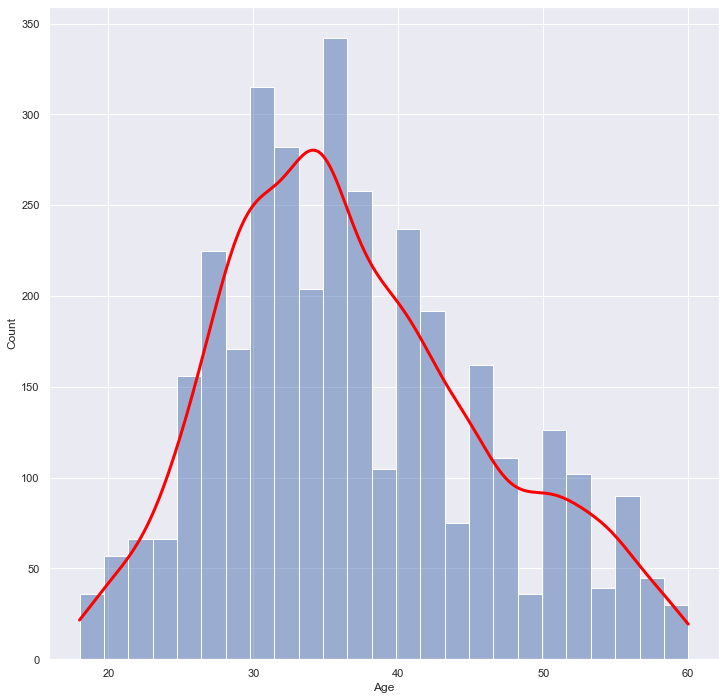

In [9]:
dens_plot = sns.histplot(data = data, x = 'Age', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)

#### Boxplot

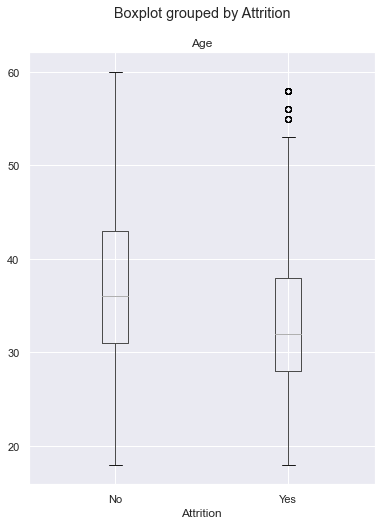

In [10]:
getPlot = data.boxplot(column='Age', by = 'Attrition', figsize=(6, 8))

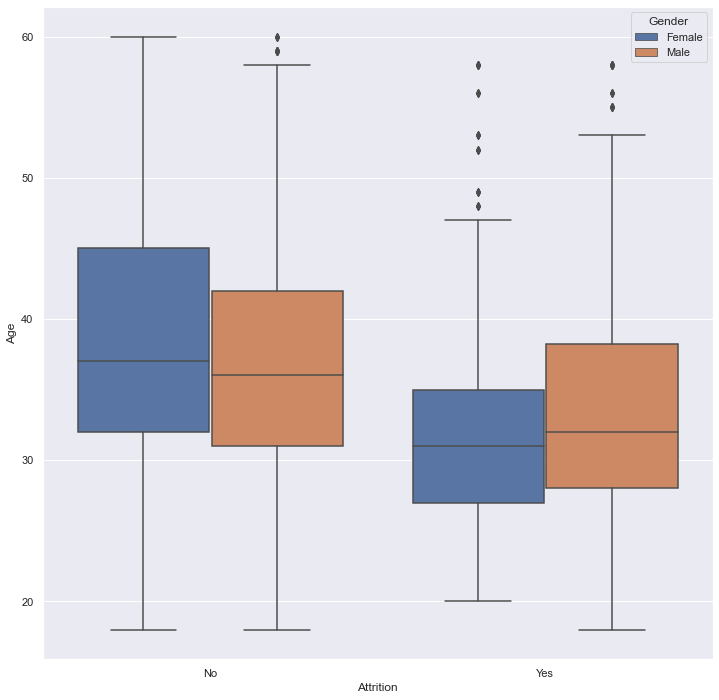

In [11]:
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=data)
plt.show()

#### Bar plot

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

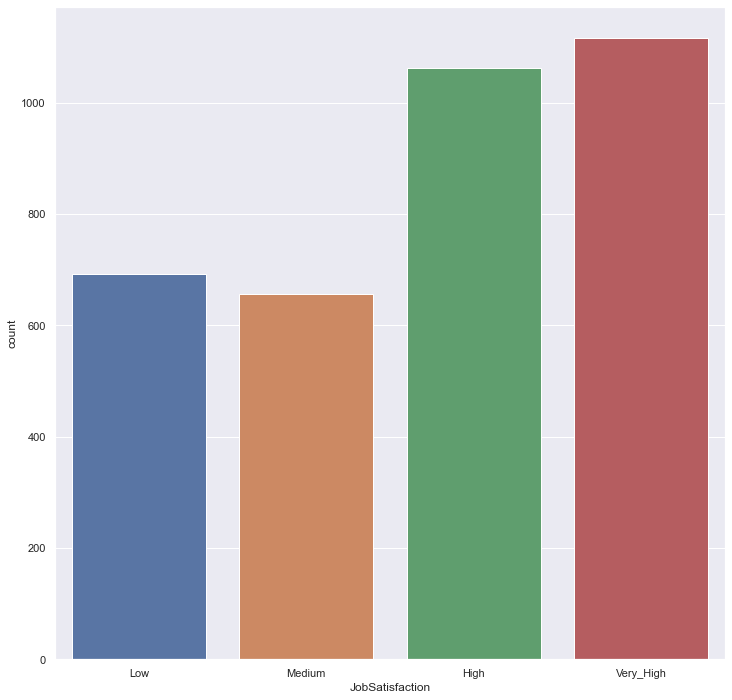

In [12]:
order = ["Low", "Medium", "High", "Very_High"]
sns.countplot(x = "JobSatisfaction", data = data, order = order)

##### Stack with percentages

In [ ]:
CT = pd.crosstab(frami['currentSmoker'], frami['male'])
CT
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)

# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns='total')

percents = CT2.div(CT.total, axis = 0).mul(100).round(2)
#La tabla percents seria la tabla de las probabilidades
percents.to_numpy()
print(percents)

percents.iloc[:, 0]
ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)

plt.show()

## Probability

### Binomial

The binom.pmf function takes in three parameters:

- n: the total number of trials or times the experiment will be carried out.
- r: a list of integers from 0 to n, inclusive.
- p: the probability that the outcome of a single experiment will be a success. The value of p must be between 0 and 1, inclusive.

#### Probability mass funcion
Prob of k = n

In [3]:
n = 12 # Change
k = 4 # Change
p = 0.41417591801878734 # Change
stats.binom.pmf(k, n = n, p = p)

0.20206092562597672

#### Cumulative distribution function
Prob of k <= n

In [6]:
n = 12 # Change
r = 1 # Change
p = 0.41417591801878734 # Change
stats.binom.cdf(r, n = n, p = p)

0.015495178760459893

#### Survival function
Prob of k > n

In [10]:
n = 4 # Change
r = 2 # Change
p = 0.41417591801878734 # Change
stats.binom.sf(r, n = n, p = p)

0.19591409418211658

In [11]:
stats.binom.pmf(3, n = n, p = p) + stats.binom.pmf(4, n = n, p = p)

0.19591409418211667

#### Interval

B(12,0.4) . Calcula la probabilidad
P(2<X<5)

In [19]:
n = 12 # Change
p = 0.4 # Change
# start and stop are INCLUDED
start = 3 # Change
stop = 4
stats.binom.cdf(k = stop, n = n, p = p) - stats.binom.cdf(k = start - 1, n = n, p = p)

0.3547348992

In [20]:
stats.binom.pmf(3, n = n, p = p) + stats.binom.pmf(4, n = n, p = p)

0.35473489919999956

## Statistics

### Confidence Interval

In [ ]:
n = 100 # Change
barX = 7.34 # Change
s = 0.31 # Change

# Short version of the critical point computation:
cl = 0.95 # Change
alpha = 1 - cl
crit_point = stats.norm.isf(alpha/2, loc = 0, scale = 1)

conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is ", conf_int)
print("Rounded to 4 digits: [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

### N samples of dataframe

In [ ]:
path = 'PreviousExams/data/empleados.csv'
data = pd.read_csv(path)
data.head()

N = 100000 # Number of iterations of the experiment
n = 12 # number of employees
sample = data.sample(n*N, replace = True) # We sample n employees with replacement N times
samples = sample.NumCompaniesWorked.values.reshape([n, N]) # We reshape the sample into a nxN matrix in order to keep the experiments separated

### Mean representativity

In [ ]:
barX=frami.heartRate.mean() # Change
s=frami.heartRate.std() # Change
dispersion=(s/barX)*100
print(f'Como el factor de dispersion es {dispersion} la media tiene una alta representatividad')

getPlot = frami.heartRate.plot.density() #Change

### Sample means of population

In [17]:
mu = 4.01 # Change
sigma = 0.912 # Change
N = 554 # Change

pob = np.random.default_rng(2022).normal(loc = mu, scale = sigma, size = N)
n=25 # Change
n_samples=10000
Population = pd.DataFrame({'Pob':pob})
sample_means = pd.DataFrame([Population.sample(n, replace=True).mean() for item in range(n_samples)], 
                            columns=['Pob'])
sample_means.head()

,Pob
0,3.714471
1,3.852791
2,3.786909
3,3.729123
4,3.817796


## Hypothesis testing

### p-Value

+ We **initially assume that the null hypothesis is true**. That is we assume:
$$\mu = \mu_0$$

+ CLT states:
$$
\bar X \sim N\left(\dfrac{\mu_0}{\frac{s}{\sqrt{n}}}\right)
$$
and as a consequence:
$$
\quad\\
\dfrac{\bar X - \mu_0}{\frac{s}{\sqrt{n}}}\sim Z
\quad\\
$$
+ We can use this information and our knowledge of the standard normal $Z$ to compute the probability of randomly obtaining a sample *as bad for $H_0$ or worse* as the one we have.

### Normality test

The left tail looks too long to be a normal variable. We confirm this by calculating it mathematically with the Shapiro-Wilk test.
- Ho: the data was drawn from a normal distribution
- Ha: the data was not drawn from a normal distribution

In [24]:
shap_wilk = stats.shapiro(data.Age)
shap_wilk.pvalue

3.938348231840188e-24

The p-value is lower than 0.05, therefore we reject the null hypothesis and we confirm that the sample was not drawn from a normal distribution 

### Mean testing

In [11]:
n = 100 # Change
mu0 = 1000 # Change
barX = 998.5 # Change
s = np.sqrt(36.1) # Change

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))


sl = 0.95
alpha = 1 - sl
criticalValue = stats.norm.isf(1 - alpha)
print("The critical value (defining the rejection region) is: {:.4}".format(criticalValue))

pValue = stats.norm.cdf(Zscore) # Change
# pValue = stats.norm.sf(Zscore)
# pValue = 2 * stats.norm.sf(Zscore) 

print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is -2.497
The critical value (defining the rejection region) is: -1.645
And the resulting p-value is: 0.006271


### T-test

#### Without file

In [12]:
n = 100 # Change
mu0 = 1000 # Change
barX = 998.5 # Change
s = np.sqrt(36.1) # Change
df = n -1

Tscore = (barX - mu0)/(s/np.sqrt(n))
print("The T score for this sample is {:.4}".format(Tscore))


sl = 0.95
alpha = 1 - sl
criticalValue = stats.t.isf(1 - alpha,  df, loc=0, scale=1)
print("The critical value (defining the rejection region) is: {:.4}".format(criticalValue))

pValue = stats.t.cdf(Tscore,  df, loc=0, scale=1) # Change
# pValue = stats.t.sf(Tscore,  df, loc=0, scale=1)
# pValue = 2 * t.norm.sf(Tscore,  df, loc=0, scale=1) 

print("And the resulting p-value is: {:.4}".format(pValue))

The T score for this sample is -2.497
The critical value (defining the rejection region) is: -1.66
And the resulting p-value is: 0.007096


#### With file

In [ ]:
link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv" # Change link
data = pd.read_csv(link)
X = data.cty # Change to the desired variable

mu0 = 16 # Change to null hypothesis mean
alternative = "greater" # Change to alternative hypothesis: less, greater or two-sided

Tscore, pValue = stats.ttest_1samp(X, 
                                   popmean=mu0,
                                   alternative=alternative)

print("The sample size is {:3d}".format(len(X)))
print("The sample mean is {:.4}".format(X.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

### Power
Probability of rejecting false null hypothesis

#### Theory

Errors of Types I and II

<div class="center">
<table>
<tbody>
<tr class="odd">
<th style="text-align: center;"></th>
<th style="text-align: center;"></th>
<th colspan="2" style="text-align: center;"><u><strong>What hypothesis is true?</strong></u></th>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>H</em><sub><em>a</em></sub></span> (alternative)
is true</strong></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>H</em><sub>0</sub></span> (null) is
true</strong></td>
</tr>
<tr class="odd">
<td style="text-align: left;"><u><strong>Test Result</strong></u></td>
<td style="text-align: center;"><strong>Reject <span
class="math inline"><em>H</em><sub>0</sub></span></strong></td>
<td style="text-align: center;">Right decision</td>
<td style="text-align: center;">Error type I (<span
class="math inline"><em>α</em></span>)</td>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong>Reject <span
class="math inline"><em>H</em><sub><em>a</em></sub></span></strong></td>
<td style="text-align: center;">Error type II (<span
class="math inline"><em>β</em></span>)</td>
<td style="text-align: center;">Right decision</td>
</tr>
</tbody>
</table>
</div>  


<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\text{power} = 1 - \beta = K\, \dfrac{\delta\,\sqrt{n}\,\alpha}{\sigma}
\quad\\
$
}
$$
</p> 

  where $K$ is a certain constant (we don't need to worry about it) and:
   + $n$ is the sample size
   + $\sigma$ is the population standard deviation.
   + $\delta$ is the **effect size**. That is the *minimal difference between $\mu$ and $\mu_0$ that we want the test to be able to detect* (in order to reject the null). This is analogous to the width of the confidence interval that we discussed in the previous session. 

In [ ]:
delta = 0.1 # Change
sd = 0.5 # Change
alpha = 0.05 # Change
n = 100 # Change

Calculate power

In [ ]:
power = smp.ttest_power(effect_size = delta / sd, 
                nobs=n, alpha=alpha, alternative="larger")

print("The power for the test is {:.3}".format(power))

Calculate sample size for given power

In [ ]:
power = 0.8

sample_size = smp.tt_solve_power(effect_size = delta / sd, 
                power = power, alpha = alpha, alternative = "larger")

print("The minimum sample size to get that power is at least {:3d}".format(
        int(np.ceil(sample_size))))

### Chi-squared

+ Three cases:
$$\begin{cases}
&\text{Null Hypothesis}&\text{Alternative Hypothesis}\\
\text{One sided (left):}& H_0 = \{\sigma^2 \leq \sigma^2_0\}, & H_a = \{\sigma^2 > \sigma^2_0\}\\
\text{One sided (right):}& H_0 = \{\sigma^2 \geq \sigma^2_0\}, & H_a = \{\sigma^2 < \sigma^2_0\}\\
\text{Two sided:}& H_0 = \{\sigma^2 = \sigma^2_0\}, & H_a = \{\sigma^2 \neq \sigma^2_0\}
\end{cases}
$$

+ The right kind of comparison uses quotients and not differences. The sampling distribution of the variance was described by this equation
$$
\quad\\
Y = (n-1)\dfrac{s^2}{\sigma^2}\, \sim\,\chi^2_k,\quad\mbox{ where }\,k=n-1.\\
$$
This equation can be used to obtain a $Y$-score that will define a p-value when we use the corresponding $\chi^2_k$ as the probability scale.  The only thing to keep in mind is that when we use this result we will change $\sigma^2$ with $\sigma_0^2$ because, just as in the case of the mean, that choice is the one that favors the null hypothesis the most.

+ Finally, when a test for the standard deviation is required we have to pay to attention and take the square or the square root of the sample values as needed. 

In [ ]:
# Load the data and check the first lines
link = "data/GEAR.txt" # Change
data = pd.read_csv(link)
data.head()
X = data.DIAMETER # Change

# Compute the required sample measures
s = X.std()
print("Sample standard deviation s =  {:.4}".format(s))
n = len(data)
print("Sample size n =  {:4d}".format(n))

# Enter the reference value sigma0 
####  Double check if it is squared!! #######
sigma0_2 = 0.000025 # Change

# Compute the chi score
chiScore = (n - 1) * s**2/sigma0_2
print("The chi square score is {:.4}".format(chiScore))


pValue = stats.chi2.cdf(chiScore, df = n -1) # Change
# pValue = stats.chi2.sf(chiScore, df = n -1)
# pValue = 2 * stats.chi2.sf(chiScore, df = n -1) 
print("The p-value is {:.4}".format(pvalue))

## Modeling

### Plots

#### Continuous variables - Scatter plot

In [ ]:
link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv" # Change
data = pd.read_csv(link) 

sns.set(rc={'figure.figsize':(12, 8)})
x = 'hwy' # Change
y = 'cty' # Change
plt.plot(x, y, 'bo', data=data)
plt.xlabel(x, fontdict={'fontsize':20})   
plt.ylabel(y, fontdict={'fontsize':20})
plt.title('Highway vs Urban fuel consumption (miles per gallon)', fontdict={'fontsize':25}) # Change
plt.show()

#### Continuous vs categorical variable - Boxplots and Violin plots

In [ ]:
link = "https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv" # Change
data = pd.read_csv(link) 

cont = 'cty' # Change
cat = 'class' # Change

class_order_by_cty = list(data[[cont, cat]].groupby(cat).median().sort_values(cont).index)

sns.boxplot(x='class', y='cty', data=data, order=class_order_by_cty)
plt.show()

In [ ]:
sns.violinplot(data=data, x=cat, y=cont, order=class_order_by_cty)
plt.show()

#### Pairplot

In [ ]:
sns.set_style("white")
sns.pairplot(data)
# sns.pairplot(data, hue="drv") # Change
plt.show()

### Regression

#### Visualization

In [ ]:
link = "./data/07_simple_linear_regression_01.csv"
data = pd.read_csv(link)

In [ ]:
data.corr()

In [ ]:
sns.pairplot(data)
plt.show()

#### Training

##### Sci-py

In [20]:
# The linear regression model in Scikit requires that
# the X array be two-dimensional. But in our case a 
# single column gives a 1D array. That is why, after
# extracting the values from the columns we reshape it.
X = data.X.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = data.Y.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))

AttributeError: 'DataFrame' object has no attribute 'X'

##### Statsmodels

In [ ]:
X_1 = sm.add_constant(X)
model_DF0 = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
DF0_fit = model_DF0.fit()
DF0_fit.summary()

#### Prediction

##### Sci-py

In [22]:
# Create an array from the list of X coordinates of new observtions
X_new = np.array([0.3])
# Make it 2D
X_new = X_new[:, np.newaxis]
# Use the predict method from our model
Y_new = XY_fit.predict(X_new)
# Look at the predicted values
print(f"The predicted value is {Y_new}")

NameError: name 'XY_fit' is not defined

##### Statsmodels

In [ ]:
X_new = [1,0.3]
fit.predict(X_new)

##### Plot dispersion diagram sci-py

In [17]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro')
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()
plt.xlabel('diaBP') # Change
plt.ylabel('sysBP') 
plt.title('Linear Regression') # Change

NameError: name 'X' is not defined

##### Plot dispersion diagram statsmodels

In [ ]:
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
fit.pred = fit.get_prediction(X_new)
fit_fitted_new = fit.pred.summary_frame(alpha=0.05)["mean"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X_new[:,1], fit_fitted_new, "y--", lw = 4)
plt.xlabel('diaBP') # Change
plt.ylabel('sysBP') 
plt.title('Linear Regression') # Change

#### Inference

In [ ]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(X)
model_DF0 = sm.OLS(Y, X_1) # OLS comes from Ordinary Least Squares
DF0_fit = model_DF0.fit()
DF0_fit.summary()

The const and x1 lines show the std error, the p-value and the conf interval

In [ ]:
# Coefficients
print(f'Coefficients: {DF0_fit.params}')
# Standard error
print(f'Standard error: {DF0_fit.bse}')
# Confidence intervals
print(f' Confidence intervals: {DF0_fit.conf_int(alpha=0.05)}')
# P-values
print(f'P-values: {DF0_fit.pvalues}')
# Pearson correlation coefficient
print(f'Pearson correlation coefficient: {DF0_fit.rsquared}')

#### Confidence bands

In [ ]:
# We create a new dataset that has 100 points equally spaced in the interval of the training set
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
# We predict for those values
DF0_fit.pred = DF0_fit.get_prediction(X_new)

In [ ]:
# Summary frame for alpha = 0.05
DF0_fit.pred.summary_frame(alpha=0.05).head()

In [ ]:
DF0_fit_fitted_new = DF0_fit.pred.summary_frame(alpha=0.05)["mean"]
DF0_fit_confBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_lower"]
DF0_fit_confBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_upper"]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_low, "y--", lw = 4)
ax.plot(X_new[:,1], DF0_fit_confBand_high, "y--", lw = 4)
ax.fill_between(X_new[:,1], 
                y1 = DF0_fit_confBand_low, 
                y2 = DF0_fit_confBand_high, 
                color='cyan', alpha = 0.5)

# Now let us fit a regression line for each sample and plot the result.
# N = 5
# palette2 = iter(sns.color_palette(palette="deep", n_colors=N))
# for sample in range(N):
#     # select the sample
#     DFs = DF.loc[sampleId == sample, :] 
#     Xs = DFs.X
#     Ys = DFs.Y
#     # fit the regression line
#     b0, b1 = getLM(Xs,Ys)
#     #print(sample, b0, b1,"\n", "--"*5)
#     # plot the line
#     Xnew = np.linspace(0, 1, num = 100)
#     Ynew = b0 + b1 * Xnew

#     plt.plot(Xnew, Ynew, color = next(palette2), alpha = 0.1)

#### Prediction bands

In [ ]:
DF0_fit_predBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["obs_ci_lower"]
DF0_fit_predBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, Y, "o", label="data")
#ax.plot(X_new[:,1], DF_fit_fitted_new, "r--.", label="OLS", lw = 4)
ax.plot(X_new[:, 1], DF0_fit_predBand_low, "y--", lw = 4)
ax.plot(X_new[:, 1], DF0_fit_predBand_high, "y--", lw = 4)
ax.fill_between(X_new[:, 1], 
                y1 = DF0_fit_predBand_low, 
                y2 = DF0_fit_predBand_high, 
                color='cyan', alpha = 0.5)

#### Diagnosis plots

In [ ]:
%run ./code/Linear_Reg_Diagnostic.py
DF0_fit_diagnose = Linear_Reg_Diagnostic(DF0_fit)

##### Residual vs Fitted plot

This graph shows if there are any nonlinear patterns in the residuals, and thus in the data as well. One of the mathematical assumptions in building an OLS model is that the data can be fit by a line. If this assumption holds and our data can be fit by a linear model, then we should see a relatively flat line when looking at the residuals vs fitted.

In [ ]:
DF0_fit_diagnose.residual_plot()
plt.show()

- The residuals should seem to follow a homogenous random vertical distribution all across the horizontal axis
- The red line should be as horizontal as possible

##### Residual QQ-plot

In [ ]:
DF0_fit_diagnose.qq_plot()
plt.show()

- The dots should mostly follow the red line

![title](fig/ZXRkL.png)

- Heavy tailed: Notice the points fall along a line in the middle of the graph, but curve off in the extremities. Normal Q-Q plots that exhibit this behavior usually mean your data has more extreme values than would be expected if they truly came from a Normal distribution.
- Skewed: Notice the points form a curve instead of a straight line. Normal Q-Q plots that look like this usually mean your sample data are skewed.

##### Scale-location plot

In [ ]:
DF0_fit_diagnose.scale_location_plot()
plt.show()

- Like resudials vs fitted

##### The Residual vs Leverage plot

We look for influential values

In [ ]:
DF0_fit_influence = DF0_fit.get_influence()
DF0_hatValues = DF0_fit_influence.hat_matrix_diag
any(DF0_hatValues > 4 / n)

In [ ]:
DF0_fit_diagnose.leverage_plot()
plt.show()

- Influential points are located above the curves
- If found, treat like outliers (do the regression with and without to understand the behavior)

### Linear Regression for Curves

In [ ]:
S2 = pd.read_csv("./data/07_simple_linear_regression_02.csv")
sns.scatterplot(x = S2.X, y = S2.Y)
plt.show()

#### Training

We create a column with the squared of x

In [ ]:
S2["X2"] = S2.X**2
print(S2.head())

We fit the model

In [ ]:
S2_fit = sm.OLS(S2.Y, sm.add_constant(S2[["X", "X2"]])).fit()
S2_fit.summary()

#### Plot the regression line

In [ ]:
X_new = np.linspace(S2.X.min(), S2.X.max(), 100)
newData = pd.DataFrame({'X':X_new, 'X2':X_new**2})
newData = sm.add_constant(newData)
newData.head()

In [ ]:
S2_pred = S2_fit.get_prediction(newData)
S2_fitted_new = S2_pred.summary_frame(alpha=0.05)["mean"]
S2_pred.summary_frame()
sns.scatterplot(x = S2.X, y = S2.Y)
sns.scatterplot(x = newData['X'], y = S2_pred.summary_frame()["mean"], color ="red")
plt.show()

### Multivariate linear models

In [ ]:
framingham_url = "https://raw.githubusercontent.com/mbdfmad/fmad2122/main/data/framingham.csv" # Change
framingham = pd.read_csv(framingham_url)
fram = framingham # shorten name
fram.dropna(inplace=True)
fram.isna().sum()

#### Training

In [ ]:
fram_fit = sm.OLS(fram.totChol, sm.add_constant(fram[["age", "BMI"]])).fit()
fram_fit.summary()

#### Prediction

In [ ]:
fram_pred = fram_fit.get_prediction(newData)

### ANOVA
Explanatory variable is a factor

In [ ]:
iris = pd.read_csv("./data/iris.csv")
iris.head()
# Check that there are no NAs!
iris.rename(columns= {'Sepal.Length':'SepalLength'},inplace=True)

Create dummies for the different species

In [ ]:
Species_dummies = pd.get_dummies(iris.Species).values
Species_dummies[45:55, :]

We eliminate one of the variables because they are not independent between them, then we use the other two for a regression model

In [ ]:
Species_dummies = Species_dummies[:, 1:]

In [ ]:
X = Species_dummies
X = sm.add_constant(X)
iris_fit = sm.OLS(iris.SepalLength, X).fit()
iris_fit.summary()

+ A model like this one is an example of the classical *One-way Anova* (one way meaning one factor):
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon, \qquad \text{ with }\quad \epsilon\sim N(0, \sigma)
$$
and $X_1, X_2$ being the reamining dummy variables.

+ You can see that the summary table for the fit contains three parameters for the model. What is their interpretation? 
  + The intercept is the mean of $Y$ = `SepalLength` of the reference level.
  + The remaining two parameters represent the difference between the mean of `SepalLength` for that level and the mean for the reference level. 
![](./fig/07-AnovaBoxplots.png)  
Let us check this:

+ The nice thing about this is that we also have inference results about the difference of those means. For example, we have a p-value to tell us if the means of `SepalLength` for `Species = setosa`,  can be considered to be significantly different from that for  `Species = virginia` and `Species = versicolor`. To be precise, the null hypothesis being tested here is:
$$
\quad\\
H_0 = \{\mu_1 = \mu_2 = \mu_3\}
\quad\\
$$
and in particular the alternative is **not** all the three means are different, but *there are two of them that are different*. But if we reject that null, we can not yet identify a significantly different pair, because that brings ut back to the problem of multiple testing, and we know that this requires extra work that we will not make here.